In [23]:
import pprint
import pandas as pd

# 1
df = pd.read_excel('data/data_5710_20220716.xlsx', index_col=0)

df.index = pd.to_datetime(df.index)
df = df.sort_index()
#print(df, '\n')


# 2

df = pd.read_excel('data/data_5710_20220716.xlsx', parse_dates=['일자'])
df = df.sort_values('일자')
#print(df, '\n')


#print(df['일자'].dtype)
#print(type(df['일자'].iloc[0]))

# Groupby 월봉 OHCL
df = df[['일자', '시가', '저가', '고가', '종가', '거래량']].copy()
df['year'] = df['일자'].dt.year
df['month'] = df['일자'].dt.month
#print(df.head())
#print(df['year'])
#print(df['month'])

gb = df.groupby(['year', 'month'])
#print("==>> gb.get_group((2021, 9)).head(): \n", gb.get_group((2021, 9)).head())

how = {
    '시가': 'first',
    '고가': max,
    '저가': min,
    '종가': 'last',
    '거래량': sum
}

print("==>> gb.agg(how): \n", gb.agg(how))

==>> gb.agg(how): 
                 시가      고가      저가      종가        거래량
year month                                           
2021 7      162000  162000  142500  147000   52762602
     8      147000  155000  141000  155000   54240960
     9      155000  157500  114000  118000  122697819
     10     118000  130500  110500  125500   57516310
     11     126000  131000  121500  122000   50391276
     12     121500  124000  112500  112500   34418041
2022 1      113500  117000   82200   85000   67362020
     2       87100   95000   84500   94100   49646154
     3       94400  110000   89600  106500   48471677
     4      105500  108000   87600   89900   31610295
     5       88400   91900   80000   85000   35611165
     6       84000   87400   66700   69900   38118975
     7       70000   75000   66200   70100   17129656


c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [24]:
df.groupby(pd.Grouper(key='일자', freq='m')).agg(how)


,시가,고가,저가,종가,거래량
일자,,,,,
2021-07-31,162000,162000,142500,147000,52762602
2021-08-31,147000,155000,141000,155000,54240960
2021-09-30,155000,157500,114000,118000,122697819
2021-10-31,118000,130500,110500,125500,57516310
2021-11-30,126000,131000,121500,122000,50391276
2021-12-31,121500,124000,112500,112500,34418041
2022-01-31,113500,117000,82200,85000,67362020
2022-02-28,87100,95000,84500,94100,49646154
2022-03-31,94400,110000,89600,106500,48471677


### 월봉 OHCLV

In [25]:
import pandas as pd
df = pd.read_excel('data/data_5710_20220716.xlsx', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.sort_index()

df['거래량'].shift(1)

c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


일자
2021-07-15          NaN
2021-07-16    3821843.0
2021-07-19    3423188.0
2021-07-20    3475792.0
2021-07-21    6652856.0
                ...    
2022-07-11    1418763.0
2022-07-12     979002.0
2022-07-13    1082539.0
2022-07-14    1156844.0
2022-07-15    1597400.0
Name: 거래량, Length: 247, dtype: float64

In [26]:
df['전일거래량'] = df['거래량'].shift(1)
df[['거래량', '전일거래량']]

,거래량,전일거래량
일자,,
2021-07-15,3821843,NaN
2021-07-16,3423188,3821843.0
2021-07-19,3475792,3423188.0
2021-07-20,6652856,3475792.0
2021-07-21,10409836,6652856.0
...,...,...
2022-07-11,979002,1418763.0
2022-07-12,1082539,979002.0
2022-07-13,1156844,1082539.0


In [27]:
cond = df['거래량'] > df['전일거래량']
cond

일자
2021-07-15    False
2021-07-16    False
2021-07-19     True
2021-07-20     True
2021-07-21     True
              ...  
2022-07-11    False
2022-07-12     True
2022-07-13     True
2022-07-14     True
2022-07-15     True
Length: 247, dtype: bool

In [28]:
print('상승일:', len(df[cond]))
print('영업일:', len(df))

상승일: 115
영업일: 247


In [29]:
df['거래량'].diff()

일자
2021-07-15          NaN
2021-07-16    -398655.0
2021-07-19      52604.0
2021-07-20    3177064.0
2021-07-21    3756980.0
                ...    
2022-07-11    -439761.0
2022-07-12     103537.0
2022-07-13      74305.0
2022-07-14     440556.0
2022-07-15       7889.0
Name: 거래량, Length: 247, dtype: float64

In [30]:
cond = df['거래량'].diff() > 0
거래량증가 = df['거래량'].diff() > 0
len(df[cond])

115

In [31]:
abs_momentum = df['종가'] / df['종가'].shift(6)
cond = (abs_momentum >= 1.02) & 거래량증가
len(df[cond])

26

In [32]:
cond.shift(1)

일자
2021-07-15      NaN
2021-07-16    False
2021-07-19    False
2021-07-20    False
2021-07-21    False
              ...  
2022-07-11    False
2022-07-12    False
2022-07-13     True
2022-07-14    False
2022-07-15    False
Length: 247, dtype: object

In [33]:
cond_modified = cond.shift(1).fillna(False)
s = df.loc[cond_modified, '종가'] / df.loc[cond_modified, '시가']
print(s.cumprod().iloc[-1])

0.975227025173814


### 04) 이동평균

In [34]:
import pandas as pd

df = pd.read_excel('data/ss_ex_1.xlsx', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.sort_index()[['종가']]

df['종가D-1'] = df['종가'].shift(1)
df['종가D-2'] = df['종가'].shift(2)
df['ma_3'] = (df['종가'] + df['종가D-1'] + df['종가D-2'])/3
df.head()

c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,종가D-1,종가D-2,ma_3
일자,,,,
2021-02-15,84200,NaN,NaN,NaN
2021-02-16,84900,84200.0,NaN,NaN
2021-02-17,83200,84900.0,84200.0,84100.000000
2021-02-18,82100,83200.0,84900.0,83400.000000
2021-02-19,82600,82100.0,83200.0,82633.333333


In [35]:
# 일반화
df['ma_3_rolling'] = df['종가'].rolling(3).mean()
df

,종가,종가D-1,종가D-2,ma_3,ma_3_rolling
일자,,,,,
2021-02-15,84200,NaN,NaN,NaN,NaN
2021-02-16,84900,84200.0,NaN,NaN,NaN
2021-02-17,83200,84900.0,84200.0,84100.000000,84100.000000
2021-02-18,82100,83200.0,84900.0,83400.000000,83400.000000
2021-02-19,82600,82100.0,83200.0,82633.333333,82633.333333
...,...,...,...,...,...
2021-08-09,81500,81500.0,82100.0,81700.000000,81700.000000
2021-08-10,80200,81500.0,81500.0,81066.666667,81066.666667
2021-08-11,78500,80200.0,81500.0,80066.666667,80066.666667


In [36]:
import pandas as pd
df = pd.read_excel('data/ss_ex_1.xlsx', index_col=0)
df.index = pd.to_datetime(df.index)

df['ma5'] = df['종가'].shift(1).rolling(5).mean()
cond = df['ma5'] < df['시가']
print(f'상승일: {len(df[cond])}')
print('영업일:', len(df))
print()
print(df[cond])

상승일: 76
영업일: 127

               종가    대비   등락률     시가     고가     저가       거래량           거래대금  \
일자                                                                            
2021-08-06  81500  -600 -0.73  81900  82500  81300  13342623  1090225883400   
2021-08-05  82100  -800 -0.97  83300  83300  82000  18485469  1526103630900   
2021-08-04  82900  1500  1.84  82200  83100  81800  25642368  2117643006850   
2021-07-26  78800  -500 -0.63  79400  79500  78800  10040975   792954940200   
2021-07-23  79300  -400 -0.50  79700  79900  79200   9098910   723397885611   
...           ...   ...   ...    ...    ...    ...       ...            ...   
2021-02-22  82200  -400 -0.48  83800  84200  82200  25419886  2113624966100   
2021-02-18  82100 -1100 -1.32  83200  83600  82100  21327683  1762033944231   
2021-02-17  83200 -1700 -2.00  83900  84200  83000  18307735  1526409421172   
2021-02-16  84900   700  0.83  84500  86000  84200  20483100  1740792201903   
2021-02-15  84200  2600  3.19  838

c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [37]:
data  = [84200, 84900, 83200, 82100, 82600]
index = ["2021-02-15", "2021-02-16", "2021-02-17", "2021-02-18", "2021-02-19"]

s = pd.Series(data, index)

s.ewm(span=3, adjust=False).mean()

2021-02-15    84200.00
2021-02-16    84550.00
2021-02-17    83875.00
2021-02-18    82987.50
2021-02-19    82793.75
dtype: float64

In [38]:
# 05) 데이터 샘플링
import pandas as pd

In [39]:
df = pd.read_excel('data/ss_ex_1.xlsx', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.sort_index()[['시가', '저가', '고가', '종가', '거래량']]
df.head()

c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15,83800,83300,84500,84200,23529706
2021-02-16,84500,84200,86000,84900,20483100
2021-02-17,83900,83000,84200,83200,18307735
2021-02-18,83200,82100,83600,82100,21327683
2021-02-19,82300,81000,82800,82600,25880879


In [40]:
df.resample('M').first()

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-28,83800,83300,84500,84200,23529706
2021-03-31,85100,83000,85300,83600,33498180
2021-04-30,82500,82000,83000,82900,18676461
2021-05-31,81000,81000,82400,81700,15710336
2021-06-30,80500,80100,81300,80600,14058401
2021-07-31,80500,80000,80600,80100,13382882
2021-08-31,79200,78700,79500,79300,11739124


In [41]:
df.resample('MS').first()

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-01,83800,83300,84500,84200,23529706
2021-03-01,85100,83000,85300,83600,33498180
2021-04-01,82500,82000,83000,82900,18676461
2021-05-01,81000,81000,82400,81700,15710336
2021-06-01,80500,80100,81300,80600,14058401
2021-07-01,80500,80000,80600,80100,13382882
2021-08-01,79200,78700,79500,79300,11739124


In [42]:
how = {
    '시가': 'first',
    '종가': 'last',
    '고가': max,
    '저가': min,
    '거래량': sum,
}

df.resample('MS').agg(how)

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-01,83800,82500,86000,81000,255020740
2021-03-01,85100,81400,85300,80600,387612356
2021-04-01,82500,81500,86200,81500,372938171
2021-05-01,81000,80500,83500,78400,352211074
2021-06-01,80500,80700,83000,79600,333099465
2021-07-01,80500,78500,81300,78100,275886253
2021-08-01,79200,74400,83300,74100,263311167


In [43]:
df.resample('3D').agg(how).dropna()

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-15,83800.0,83200.0,86000.0,83000.0,62320541
2021-02-18,83200.0,82600.0,83600.0,81000.0,47208562
2021-02-21,83800.0,82000.0,84200.0,81100.0,46007200
2021-02-24,81800.0,82500.0,85400.0,81300.0,99484437
2021-03-02,85100.0,82400.0,85300.0,82200.0,77728643
2021-03-05,81100.0,82100.0,82600.0,81100.0,20508971
2021-03-08,82900.0,80900.0,83000.0,80600.0,63100442
2021-03-11,81000.0,82800.0,83500.0,81000.0,37348870
2021-03-14,82800.0,82800.0,83000.0,81800.0,26029335


In [44]:
temp = df.resample('3D').agg(how)
temp.index = temp.index + pd.to_timedelta('2D')
temp.dropna()

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-17,83800.0,83200.0,86000.0,83000.0,62320541
2021-02-20,83200.0,82600.0,83600.0,81000.0,47208562
2021-02-23,83800.0,82000.0,84200.0,81100.0,46007200
2021-02-26,81800.0,82500.0,85400.0,81300.0,99484437
2021-03-04,85100.0,82400.0,85300.0,82200.0,77728643
2021-03-07,81100.0,82100.0,82600.0,81100.0,20508971
2021-03-10,82900.0,80900.0,83000.0,80600.0,63100442
2021-03-13,81000.0,82800.0,83500.0,81000.0,37348870
2021-03-16,82800.0,82800.0,83000.0,81800.0,26029335


In [45]:
df.resample('3D', offset='1D').agg(how)

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-13,83800,84200,84500,83300,23529706
2021-02-16,84500,82100,86000,82100,60118518
2021-02-19,82300,82600,82800,81000,25880879
2021-02-22,83800,82000,84200,81100,72814851
2021-02-25,84000,82500,85400,82000,72676786
...,...,...,...,...,...
2021-07-31,79200,79300,79500,78700,11739124
2021-08-03,79400,82100,83300,79300,68467197
2021-08-06,81900,81500,82500,81300,13342623


In [46]:
df.resample('12H').agg(how)

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,84200.0,84500.0,83300.0,23529706
2021-02-15 12:00:00,NaN,NaN,NaN,NaN,0
2021-02-16 00:00:00,84500.0,84900.0,86000.0,84200.0,20483100
2021-02-16 12:00:00,NaN,NaN,NaN,NaN,0
2021-02-17 00:00:00,83900.0,83200.0,84200.0,83000.0,18307735
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,30241137
2021-08-11 12:00:00,NaN,NaN,NaN,NaN,0
2021-08-12 00:00:00,77100.0,77000.0,78200.0,76900.0,42365223


In [47]:
df.resample('12H').agg(how).ffill()

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,84200.0,84500.0,83300.0,23529706
2021-02-15 12:00:00,83800.0,84200.0,84500.0,83300.0,0
2021-02-16 00:00:00,84500.0,84900.0,86000.0,84200.0,20483100
2021-02-16 12:00:00,84500.0,84900.0,86000.0,84200.0,0
2021-02-17 00:00:00,83900.0,83200.0,84200.0,83000.0,18307735
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,30241137
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0,0
2021-08-12 00:00:00,77100.0,77000.0,78200.0,76900.0,42365223


In [48]:
import numpy as np

temp = df.resample('12H').agg(how)
cond = temp.isna().any(axis=1)
temp.loc[cond, '거래량'] = np.NaN

In [49]:
temp.ffill()

,시가,종가,고가,저가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,84200.0,84500.0,83300.0,23529706.0
2021-02-15 12:00:00,83800.0,84200.0,84500.0,83300.0,23529706.0
2021-02-16 00:00:00,84500.0,84900.0,86000.0,84200.0,20483100.0
2021-02-16 12:00:00,84500.0,84900.0,86000.0,84200.0,20483100.0
2021-02-17 00:00:00,83900.0,83200.0,84200.0,83000.0,18307735.0
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,30241137.0
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0,30241137.0
2021-08-12 00:00:00,77100.0,77000.0,78200.0,76900.0,42365223.0


In [50]:
# 06) 수익률 계산하기
data = {'삼성전자': [52200, 52300, 52900, 52000, 51700], 
           'LG전자': [68200, 67800, 68800, 67500, 66300]}

In [51]:
df = pd.DataFrame(data=data)
df.pct_change()

,삼성전자,LG전자
0,NaN,NaN
1,0.001916,-0.005865
2,0.011472,0.014749
3,-0.017013,-0.018895
4,-0.005769,-0.017778


In [52]:
df / df.shift(2) - 1

,삼성전자,LG전자
0,NaN,NaN
1,NaN,NaN
2,0.013410,0.008798
3,-0.005736,-0.004425
4,-0.022684,-0.036337


In [53]:
df.pct_change(periods=2)

,삼성전자,LG전자
0,NaN,NaN
1,NaN,NaN
2,0.013410,0.008798
3,-0.005736,-0.004425
4,-0.022684,-0.036337


In [54]:
yeild = df.pct_change(periods=2) + 1
yeild.cumprod()

,삼성전자,LG전자
0,NaN,NaN
1,NaN,NaN
2,1.013410,1.008798
3,1.007597,1.004334
4,0.984740,0.967839


In [55]:
import pandas as pd

df = pd.read_excel('data/ss_ex_1.xlsx', index_col=0, usecols=[0, 1, 4])
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.head()

c:\Users\sms20\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,시가
일자,,
2021-02-15,84200,83800
2021-02-16,84900,84500
2021-02-17,83200,83900
2021-02-18,82100,83200
2021-02-19,82600,82300


In [56]:
df_quarter = df['시가'].resample('q').first().to_frame()

In [57]:
df_quarter

,시가
일자,
2021-03-31,83800
2021-06-30,82500
2021-09-30,80500


In [58]:
df_quarter2 = df['시가'].groupby(pd.Grouper(freq='q')).first().to_frame()
df_quarter2

,시가
일자,
2021-03-31,83800
2021-06-30,82500
2021-09-30,80500


In [59]:
df_quarter['quarter'] = df_quarter.index.quarter
df['quarter'] = df.index.quarter

In [60]:
df

,종가,시가,quarter
일자,,,
2021-02-15,84200,83800,1
2021-02-16,84900,84500,1
2021-02-17,83200,83900,1
2021-02-18,82100,83200,1
2021-02-19,82600,82300,1
...,...,...,...
2021-08-09,81500,81500,3
2021-08-10,80200,82300,3
2021-08-11,78500,79600,3


In [61]:
df_daily = df[['종가', 'quarter']].reset_index()
r = pd.merge(left=df_daily, right=df_quarter, on='quarter')

In [62]:
r

,일자,종가,quarter,시가
0,2021-02-15,84200,1,83800
1,2021-02-16,84900,1,83800
2,2021-02-17,83200,1,83800
3,2021-02-18,82100,1,83800
4,2021-02-19,82600,1,83800
...,...,...,...,...
122,2021-08-09,81500,3,80500
123,2021-08-10,80200,3,80500
124,2021-08-11,78500,3,80500
125,2021-08-12,77000,3,80500


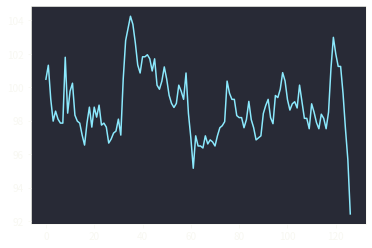

In [65]:
import matplotlib.pyplot as plt

r['수익률'] = r['종가'] / r['시가']
plt.plot(r['수익률']*100)
plt.show()

In [64]:
r = r.set_index(['quarter', '일자'])
r

0      1.004773
1      1.013126
2      0.992840
3      0.979714
4      0.985680
         ...   
122    1.012422
123    0.996273
124    0.975155
125    0.956522
126    0.924224
Name: 수익률, Length: 127, dtype: float64
